In [5]:
import numpy as np
import random
from cvxopt import matrix, solvers
import time
import matplotlib.pyplot as plt

In [133]:
solvers.options['show_progress'] = False

In [6]:
class Soccer:
    def __init__(self):
        self.pos = [np.array([0,2]), np.array([0,1])]  #(playerA,playerB) corrdinates
        self.player_has_ball = 1 #possession of ball with player B
        self.goal = [0,3] # (A's goal, B's goal)
        self.cols = 4
        self.rows = 2
        self.action_space = 5
    def action_space_sample(self):
        return [np.random.randint(self.action_space),(np.random.randint(self.action_space))]
        #return [np.random.choice([0,1,2,3,4], 1)[0],np.random.choice([0,1,2,3,4], 1)[0]]
    
    def state(self):
        return [self.pos[0][0] * 4 + self.pos[0][1], self.pos[1][0] * 4 + self.pos[1][1], self.player_has_ball]
    def play(self, actions):
        current_position = self.pos.copy()
        new_position = current_position
        scores = [0,0]
        possible_actions = [[0,0],[0,1],[1,0],[0,-1],[-1,0]]
        first_mover = np.random.randint(50)%2
        second_mover = 1 - first_mover
        done = False
        #print("action0= " + str(actions[0]))
        #print("action1= " + str(actions[1]))
        if actions[0] not in range(0,5) or actions[1] not in range(0,5):
            qstate = self.state()
            print("Invalid action")
            return qstate, scores, done
        else:
            new_position[first_mover] = self.pos[first_mover] + possible_actions[actions[first_mover]]
            
            if (new_position[first_mover] == self.pos[second_mover]).all():
                if first_mover == self.player_has_ball:
                    self.player_has_ball = second_mover
            elif new_position[first_mover][0] in range(0,2) and new_position[first_mover][1] in range(0,4):
                self.pos[first_mover] = new_position[first_mover]
                if self.player_has_ball == first_mover and self.pos[first_mover][1] == self.goal[first_mover]:
                    scores = ([1, -1][first_mover]) * np.array([100, -100])
                    done = True
                    qstate = self.state()
                    return qstate, scores, done
                elif self.player_has_ball == first_mover and self.pos[first_mover][1] == self.goal[second_mover]:
                    scores = ([1, -1][first_mover]) * np.array([-100, 100])
                    done = True
                    qstate = self.state()
                    return qstate, scores, done
            new_position[second_mover] = self.pos[second_mover] + possible_actions[actions[second_mover]]
            if (new_position[second_mover] == self.pos[first_mover]).all():
                if second_mover == self.player_has_ball:
                    self.player_has_ball = first_mover
            elif new_position[second_mover][0] in range(0,2) and new_position[second_mover][1] in range(0,4):
                self.pos[second_mover] = new_position[second_mover]
                if self.player_has_ball == second_mover and self.pos[second_mover][1] == self.goal[second_mover]:
                    scores = ([1, -1][second_mover]) * np.array([100, -100])
                    done = True
                    qstate = self.state()
                    return qstate, scores, done
                elif self.player_has_ball == second_mover and self.pos[second_mover][1] == self.goal[first_mover]:
                    scores = ([1, -1][second_mover]) * np.array([-100, 100])
                    done = True
                    qstate = self.state()
                    return qstate, scores, done
        qstate = self.state()
        return qstate, scores, done

In [7]:
def error_plot(errors, title):
    plt.plot(errors, linestyle='-', linewidth=0.6)
    plt.title(title)
    plt.ylim(0, 0.5)
    plt.xlabel('Simulation Iteartion')
    plt.ylabel('Q-value Difference')
    plt.ticklabel_format(style='sci', axis='x',
                         scilimits=(0,0), useMathText=True)
    plt.show()

In [8]:
env = Soccer()

In [10]:
maxval = 0
for i in range(10):
    sample1 = env.action_space_sample()
    
    print(sample1)

[0, 1]
[0, 3]
[4, 4]
[2, 0]
[0, 4]
[4, 2]
[2, 3]
[0, 4]
[0, 3]
[1, 3]


In [11]:
done = False
soccer = Soccer()
while(done==False):
    mova = np.random.randint(4)
    movb = np.random.randint(4)
    actions = [mova,movb]
    #print(soccer.play(actions))
    qstate, scores, done = soccer.play(actions)
    playera_pos, playerb_pos = soccer.pos
    print("playerA" + str(playera_pos) + " playerB" + str(playerb_pos) + " ball=" + str(soccer.player_has_ball) +" scores =" + str(scores) + " done=" + str(done))
    
    

playerA[1 2] playerB[0 1] ball=0 scores =[0, 0] done=False
playerA[1 2] playerB[0 1] ball=0 scores =[0, 0] done=False
playerA[1 1] playerB[0 2] ball=0 scores =[0, 0] done=False
playerA[1 1] playerB[0 1] ball=0 scores =[0, 0] done=False
playerA[1 1] playerB[0 0] ball=0 scores =[0, 0] done=False
playerA[1 1] playerB[1 0] ball=0 scores =[0, 0] done=False
playerA[1 1] playerB[1 0] ball=0 scores =[0, 0] done=False
playerA[1 1] playerB[1 0] ball=0 scores =[0, 0] done=False
playerA[1 1] playerB[1 0] ball=1 scores =[0, 0] done=False
playerA[1 2] playerB[1 0] ball=0 scores =[0, 0] done=False
playerA[1 2] playerB[1 0] ball=0 scores =[0, 0] done=False
playerA[1 2] playerB[1 0] ball=0 scores =[0, 0] done=False
playerA[1 2] playerB[1 0] ball=0 scores =[0, 0] done=False
playerA[1 3] playerB[1 0] ball=0 scores =[-100  100] done=True


In [8]:
def Q_learning(num_episodes):
    env = Soccer()
    discount_factor = 0.9
    alpha = 1.0
    alpha_min = 0.001
    alpha_decay = 0.999995
    epsilon = 1.0
    epsilon_min = 0.001
    epsilon_decay = 0.999995
    error_vector = []
    cols = 8
    num_states = env.cols * env.rows
    num_actions = env.action_space
    QA = np.zeros((num_states,num_states,2,num_actions))
    QB = np.zeros((num_states,num_states,2,num_actions))
    start_time = time.time()
    
    for i in range(num_episodes):
        env = Soccer()
        state = env.reset()
        done = False
    

In [12]:
def FriendQ_learning(num_episodes):
    env = Soccer()
    gamma = 0.9
    alpha = 1.0
    alpha_min = 0.001
    alpha_decay = 0.999995
    epsilon = 1.0
    epsilon_min = 0.001
    epsilon_decay = 0.999995
    error_vector = []
    
    np.random.seed(1234)
    num_states = env.cols * env.rows
    num_actions = env.action_space
    QA = np.zeros((num_states,num_states,2,num_actions,num_actions))
    QB = np.zeros((num_states,num_states,2,num_actions,num_actions))
    start_time = time.time()
    def get_control_state(Q):
        return Q[2][1][1][0][2]
    
    def generate_action(Q, state, epsilon):
        # epsilon-greey to take best action from action-value function
        if np.random.random() < epsilon:
            return np.random.choice([0,1,2,3,4], 1)[0]

        max_idx = np.where(Q[state[0]][state[1]][state[2]] == np.max(Q[state[0]][state[1]][state[2]]))
        return max_idx[1][np.random.choice(range(len(max_idx[0])), 1)[0]]
    i = 0
    #for i in range(num_episodes):
    while i < num_episodes:
        
        env = Soccer()
        state = env.state()
        done = False
        control_state_prev = get_control_state(QA)
        while done == False:
            alpha = 1 / (i / alpha_min / num_episodes + 1)
            i += 1
            if i % 1000 == 0:
                print('\rstep {}\t Time: {:.2f} \t Percentage: {:.2f}% \t Alpha: {:.3f}'.format(i, time.time() - start_time, i*100/num_episodes, alpha), end="")
            #actions = [generate_action(QA,state,epsilon), generate_action(QB,state,epsilon)]
            if np.random.uniform(0,1) < epsilon:
                actions = env.action_space_sample()
            else:
                
                max_qa_actions = np.where(QA[state[0]][state[1]][state[2]] == np.max(QA[state[0]][state[1]][state[2]]))
                max_qb_actions = np.where(QB[state[0]][state[1]][state[2]] == np.max(QB[state[0]][state[1]][state[2]]))
                actions = [max_qa_actions[1][0],max_qb_actions[1][0]]
            
            control_state_prev = get_control_state(QA)
            new_state, rewards, done = env.play(actions)
            QA[state[0]][state[1]][state[2]][actions[1]][actions[0]] = (1-alpha)* QA[state[0]][state[1]][state[2]][actions[1]][actions[0]] + alpha * (rewards[0] + gamma * np.max(QA[new_state[0]][new_state[1]][new_state[2]]))
            QB[state[0]][state[1]][state[2]][actions[0]][actions[1]] = (1-alpha)* QB[state[0]][state[1]][state[2]][actions[0]][actions[1]] + alpha * (rewards[1] + gamma * np.max(QB[new_state[0]][new_state[1]][new_state[2]]))
            state = new_state
            control_state_new = get_control_state(QA)
            error = abs(control_state_new-control_state_prev)
            error_vector.append(error)
            
            epsilon *= epsilon_decay
            if epsilon < epsilon_min:
                epsilon = epsilon_min
        control_state_prev = get_control_state(QA)
        QA[state[0]][state[1]][state[2]][actions[1]][actions[0]] = QA[state[0]][state[1]][state[2]][actions[1]][actions[0]] + alpha * (rewards[0] - QA[state[0]][state[1]][state[2]][actions[1]][actions[0]])
        QB[state[0]][state[1]][state[2]][actions[0]][actions[1]] = QB[state[0]][state[1]][state[2]][actions[0]][actions[1]] + alpha * (rewards[1] - QB[state[0]][state[1]][state[2]][actions[0]][actions[1]])
        control_state_new = get_control_state(QA)
        error = abs(control_state_new-control_state_prev)
        error_vector.append(error)
        
        
        #alpha *= alpha_decay
        #if alpha < alpha_min:
        #    alpha = alpha_min
        
    
    return error_vector

In [13]:
errors = FriendQ_learning(int(1e6))

step 1000000	 Time: 58.20 	 Percentage: 100.00% 	 Alpha: 0.001

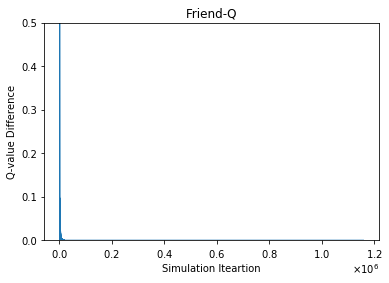

In [15]:
#error_plot(np.array(errors)[np.where(np.array(errors) > 0)], 'Friend-Q')
error_plot(np.array(errors), 'Friend-Q')

In [104]:
num_states = 3
num_actions =5
Qa = np.zeros((num_states,num_states,2,num_actions,num_actions))
print(np.shape(Qa))
for i in range(num_states):
    for j in range(num_states):
        for k in range(2):
            for l in range(num_actions):
                for m in range(num_actions):
                    num = np.random.randint(100)
                    Qa[i][j][k][l][m] = num
print(Qa[0][1][1])

(3, 3, 2, 5, 5)
[[42. 23. 67. 95. 12.]
 [77. 83. 85. 51. 30.]
 [49. 19.  3.  1. 89.]
 [18. 48.  6. 90. 36.]
 [14.  5. 94. 99. 74.]]


In [105]:
Qa[0][1][1]

array([[42., 23., 67., 95., 12.],
       [77., 83., 85., 51., 30.],
       [49., 19.,  3.,  1., 89.],
       [18., 48.,  6., 90., 36.],
       [14.,  5., 94., 99., 74.]])

In [106]:
A = np.append(np.ones((num_actions,1)), -Qa[0][1][1], axis=1)
print(A)
print(len(A))

[[  1. -42. -23. -67. -95. -12.]
 [  1. -77. -83. -85. -51. -30.]
 [  1. -49. -19.  -3.  -1. -89.]
 [  1. -18. -48.  -6. -90. -36.]
 [  1. -14.  -5. -94. -99. -74.]]
5


In [107]:
print(matrix(A))

[ 1.00e+00 -4.20e+01 -2.30e+01 -6.70e+01 -9.50e+01 -1.20e+01]
[ 1.00e+00 -7.70e+01 -8.30e+01 -8.50e+01 -5.10e+01 -3.00e+01]
[ 1.00e+00 -4.90e+01 -1.90e+01 -3.00e+00 -1.00e+00 -8.90e+01]
[ 1.00e+00 -1.80e+01 -4.80e+01 -6.00e+00 -9.00e+01 -3.60e+01]
[ 1.00e+00 -1.40e+01 -5.00e+00 -9.40e+01 -9.90e+01 -7.40e+01]



In [112]:
def minmax1(Q, state):
    A = Q[state[0]][state[1]][state[2]]
    numvar = len(A)
    c1 = [0 for i in range(numvar)]
    c1 = [-1] + c1
    c1 = np.array(c1, dtype="float")
    c1 = matrix(c1)
    #print(c1)
    A1 = np.copy(A)
    A1 *= -1
    G = np.array(A1, dtype="float")
    G = matrix(G)
    G = np.transpose(G)
    G1 = np.eye(numvar, dtype="float") * -1
    
    G = np.vstack([G,G1]) 
    
    v_matrix = [1 for i in range(numvar)] + [0 for i in range(numvar)]
    v_matrix = np.matrix(v_matrix, dtype="float")
    v_matrix = matrix(v_matrix)
    #G = np.hstack([v_matrix, G])
    G = np.insert(G, 0, v_matrix, axis=1)
    G = matrix(G)
    #print(v_matrix)
    #print('c1 = ' + str(c1))
    #print('G = ' + str(G))
    #print('A = ' + str(A))
    h = [0 for i in range (2*numvar)]
    h = np.matrix(h, dtype="float").T
    h = matrix(h)
    #print('h = ' + str(h))
    A = [0] + [1 for i in range(numvar)]
    A = np.matrix(A, dtype="float")
    A = matrix(A)
    #print('A = ' + str(A))
    b = np.matrix(1, dtype = "float")
    b = matrix(b)
    #print('b = ' + str(b))
    sol = solvers.lp(c=c1, G=G, h=h, A=A, b=b)
    return np.abs(sol['x'][1:]).reshape((5,)) / sum(np.abs(sol['x'][1:])), np.array(sol['x'][0])

In [113]:
sol = minmax1(Qa[0][1][1])

TypeError: minmax1() missing 1 required positional argument: 'state'

In [136]:
def max_min(Q, state):
        #numvar = len(A)
        c = matrix([-1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
        G = matrix(np.append(np.append(np.ones((5,1)), -Q[state[0]][state[1]][state[2]], axis=1), np.append(np.zeros((5,1)), -np.eye(5), axis=1), axis=0))
        h = matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
        A = matrix([[0.0],[1.0], [1.0], [1.0], [1.0], [1.0]])
        b = matrix(1.0)
        sol = solvers.lp(c=c, G=G, h=h, A=A, b=b)
        return np.abs(sol['x'][1:]).reshape((5,)) / sum(np.abs(sol['x'][1:])), np.array(sol['x'][0])


TypeError: max_min() missing 1 required positional argument: 'state'

In [139]:
def FoeQ_Learning(num_episodes):
    env = Soccer()
    gamma = 0.9
    alpha = 1.0
    alpha_min = 0.001
    alpha_decay = 10**(np.log10(alpha_min)/num_episodes)
    epsilon = 1.0
    epsilon_min = 0.001
    epsilon_decay = 10**(np.log10(epsilon_min)/num_episodes)
    error_vector = []
    
    np.random.seed(1234)
    num_states = env.cols * env.rows
    num_actions = env.action_space
    QA = np.zeros((num_states,num_states,2,num_actions,num_actions))
    QB = np.zeros((num_states,num_states,2,num_actions,num_actions))
    Pia = np.ones((num_states, num_states, 2, num_actions)) * 1/5
    Pib = np.ones((num_states, num_states, 2, num_actions)) * 1/5
    Va = np.ones((num_states, num_states, 2)) * 1.0
    Vb = np.ones((num_states, num_states, 2)) * 1.0
    start_time = time.time()
    def get_control_state(Q):
        return Q[2][1][1][0][2]
    
    def generate_action(Q, state, epsilon):
        # epsilon-greey to take best action from action-value function
        if np.random.random() < epsilon:
            return np.random.choice([0,1,2,3,4], 1)[0]

        max_idx = np.where(Q[state[0]][state[1]][state[2]] == np.max(Q[state[0]][state[1]][state[2]]))
        return max_idx[1][np.random.choice(range(len(max_idx[0])), 1)[0]]
        
    i = 0
    #for i in range(num_episodes):
    while i < num_episodes:
        
        env = Soccer()
        state = env.state()
        done = False
        control_state_prev = get_control_state(QA)
        while done == False:
            #alpha = 1 / (i / alpha_min / num_episodes + 1)
            i += 1
            if i % 1000 == 0:
                print('\rstep {}\t Time: {:.2f} \t Percentage: {:.2f}% \t Alpha: {:.3f}'.format(i, time.time() - start_time, i*100/num_episodes, alpha), end="")
            #actions = [generate_action(QA,state,epsilon), generate_action(QB,state,epsilon)]
            if np.random.uniform(0,1) < epsilon:
                actions = env.action_space_sample()
            else:
                action_a = np.random.choice([0,1,2,3,4], 1, p=Pia[state[0]][state[1]][state[2]])[0]
                action_b = np.random.choice([0,1,2,3,4], 1, p=Pib[state[0]][state[1]][state[2]])[0]
                actions = [action_a,action_b]
                #max_qa_actions = np.where(QA[state[0]][state[1]][state[2]] == np.max(QA[state[0]][state[1]][state[2]]))
                #max_qb_actions = np.where(QB[state[0]][state[1]][state[2]] == np.max(QB[state[0]][state[1]][state[2]]))
                #actions = [max_qa_actions[1][0],max_qb_actions[1][0]]
            
            control_state_prev = get_control_state(QA)
            
            new_state, rewards, done = env.play(actions)
            
            QA[state[0]][state[1]][state[2]][actions[1]][actions[0]] = (1-alpha)* QA[state[0]][state[1]][state[2]][actions[1]][actions[0]] + alpha * (rewards[0] + gamma * Va[new_state[0]][new_state[1]][new_state[2]])
            
            pi, val = max_min(QA, state)
            Pia[state[0]][state[1]][state[2]] = pi
            Va[state[0]][state[1]][state[2]] = val
            
            QB[state[0]][state[1]][state[2]][actions[0]][actions[1]] = (1-alpha)* QB[state[0]][state[1]][state[2]][actions[0]][actions[1]] + alpha * (rewards[1] + gamma * Vb[new_state[0]][new_state[1]][new_state[2]])
            pi, val = max_min(QB, state)
            Pib[state[0]][state[1]][state[2]] = pi
            Vb[state[0]][state[1]][state[2]] = val
            state = new_state
            
            control_state_new = get_control_state(QA)
            error = abs(control_state_new-control_state_prev)
            error_vector.append(error)
            
            #epsilon *= epsilon_decay
            #if epsilon < epsilon_min:
            #    epsilon = epsilon_min
            
            alpha = alpha_decay ** i
            epsilon = epsilon_decay ** i
        
        
        
        #alpha *= alpha_decay
        #if alpha < alpha_min:
        #    alpha = alpha_min
        
    
    return error_vector
    

In [140]:
errors = FoeQ_Learning(int(1e6))

step 1001000	 Time: 4124.48 	 Percentage: 100.10% 	 Alpha: 0.001

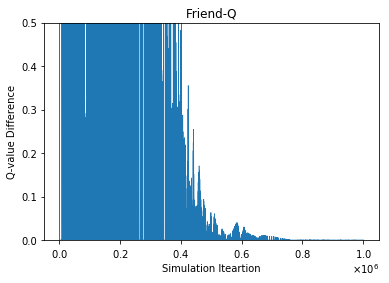

In [141]:
error_plot(np.array(errors), 'Foe-Q')

In [28]:
env = Soccer()
num_states = env.cols * env.rows
num_actions = env.action_space
state = env.state()
QA = np.zeros((num_states,num_states,2,num_actions,num_actions))
QA[state[0]][state[1]][state[2]][1][4] = 100

In [29]:
max_idx = np.where(QA[state[0]][state[1]][state[2]] == np.max(QA[state[0]][state[1]][state[2]]))

In [33]:
print(max_idx[1][0])

4


In [34]:
max_idx[1][np.random.choice(range(len(max_idx[0])), 1)[0]]

4